In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

import re
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

import gensim
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataframe
df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None, names=['review', 'sentiment'])

In [3]:
df.head(10)

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [4]:
df.shape

(1000, 2)

In [5]:
#checking for null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
#checking for duplicates
df.duplicated().sum()

10

In [7]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(990, 2)

In [9]:
df.sentiment.value_counts()

0    497
1    493
Name: sentiment, dtype: int64

<AxesSubplot:>

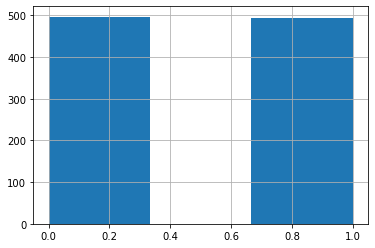

In [10]:
df['sentiment'].hist(bins=3)

In [11]:
#processing review text for word cloud
df_rv = df['review'].str.lower()
stopwords = set(STOPWORDS)
text = " ".join(review for review in df_rv)

In [12]:
#instanciating Wordcloud from wordcloud library
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=100, min_word_length=4).generate(text)

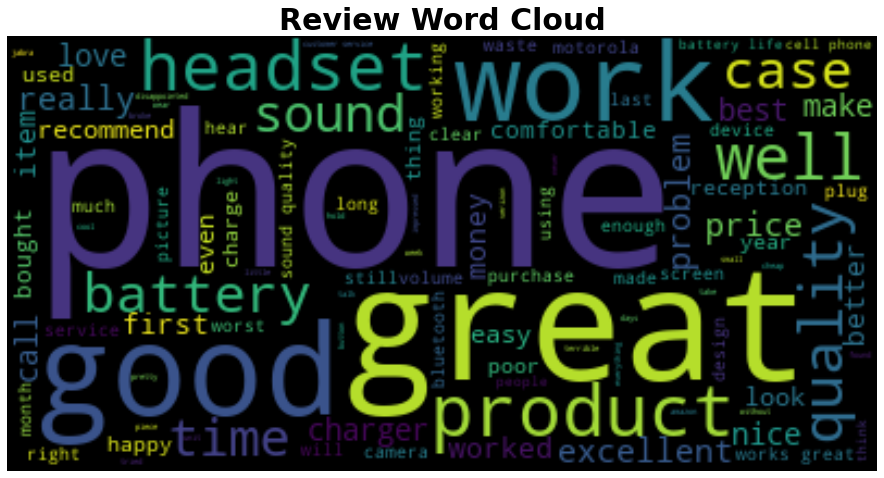

In [13]:
#WordCloud plot using matplotlib
fig=plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Review Word Cloud', fontsize=30, fontweight= 'bold')
plt.show()

In [14]:
rev_tx =[]

for line in df['review']:
    rex = re.sub('[^\w\s]', '', line) #removing punctuations using regular expressions
    wd = ''
    for word in rex:
        wd += (word.lower())
        
    rev_tx.append(wd)
    

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #instancating stopwords from nltk 
lemmatizer = WordNetLemmatizer() #instanciating lemmatizer

rev_txt = []
for txt in rev_tx:
    word = word_tokenize(txt) #tokenizing review text
    wd = ' '.join([w for w in word if not w in stop_words]) #removing stopwords
    wd = lemmatizer.lemmatize(wd) # lemmatizing the text
    print(wd)
    rev_txt.append(wd)

way plug us unless go converter
good case excellent value
great jawbone
tied charger conversations lasting 45 minutesmajor problems
mic great
jiggle plug get line right get decent volume
several dozen several hundred contacts imagine fun sending one one
razr owneryou must
needless say wasted money
waste money time
sound quality great
impressed going original battery extended battery
two seperated mere 5 ft started notice excessive static garbled sound headset
good quality though
design odd ear clip comfortable
highly recommend one blue tooth phone
advise everyone fooled
far good
works great
clicks place way makes wonder long mechanism would last
went motorolas website followed directions could get pair
bought use kindle fire absolutely loved
commercials misleading
yet run new battery two bars thats three days without charging
bought mother problem battery
great pocket pc phone combination
ive owned phone 7 months say best mobile phone ive
didnt think instructions provided helpful
peopl

low quality
highly recommend modest priced cellular phone
get better reception clarity phone ive
warning stay away
wish could return unit get back money
awsome device works great
used talk 1 1 12 hours battery would literally drained dying
dont find bad unit comes one earpad onlyi would recommend anyone
displeased
might gotten defect would risk buying built quality alone
made case small difficult install
restored phone like new performance
would recommend purchasing jabra jx10 series 2 works flawlessly moto q go figure
searched internet found one best value
fit
happy product
screen size big key pad lit well enough camera quality excellent camera phone
theres really nothing bad say headset
im glad found product amazon hard find wasnt high priced
portable works
colleague get great receptiona little expensive performance great
even fully charged went bed turned blue tooth wifi noticed 20 left morning
ive also problems phone reading memory card always turn
good wearing hat sunglasses
timel

linksys way exchange bad phone refurb unit something
phone sturdy nokia bar phones
great phone
placed treo case snug lot extra room sides
im pleased
battery terrible
found product easy set use
earpiece large heavyit keeps falling ear
utter crap sound quality terrible
charger arrived within promised timeframe work
ear loop needed tiny sound great
finally three four times spring latch broke could use longer visor
handsfree part works fine car tries download address book treo rebootsoverall still rate device high
talk useless customer service
felt light tinny
fit palm tungsten e2 broke first time tried plug
im happy purchase good quality low price
love look feel samsung flipphones
welldesigned sharp blue nice color
everything
could recommend
nice sound
looks good picture case huge disappointment
much less jawbone going replace
setup went smoothly
extremely slow takes forever anything
must study anyone interested worst sins industrial design
first thing happened tracking
well made easy acc

excellent dualpurpose headset
excellent
work listening music cingular 8125
seems completely secure holding belt keeping iphone inside
bottowm lineanother worthless cheap gimmick sprint
trouble volume
good thing fits comfortably small ears
warning buy
pairing iphone could happier far
opens battery connection broken device turned
didnt want clip going top ear causing discomfort
best headset ever
dont trust website dont expect helpful support
loudglad say plantronics 510 maintains flawless connection cell static normal use
speaker low quality making ring tones sound cheap
fits comfortably came three sizes earbud tips
bad reception
product high quality chinese crap
quite comfortable ear
dont buy product fails
everything product wrongfirst
pairing two devices easy barely took couple minutes started making calls voice dialing feature
utterly confusing first caused lose couple important contacts
terrible phone holder
cutouts buttons placed perfectly
love able use one headset landline cell
pro

In [16]:
df['review'] = rev_txt
df.head(10)

,review,sentiment
0,way plug us unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting 45 minutesm...,0
4,mic great,1
5,jiggle plug get line right get decent volume,0
6,several dozen several hundred contacts imagine...,0
7,razr owneryou must,1
8,needless say wasted money,0
9,waste money time,0


In [17]:
# the word embedding model in gensim using CBOW 
model = gensim.models.Word2Vec(rev_txt, min_count = 1, window = 5, workers = 4, vector_size=990)

In [18]:
# geting the vectors from the model
all_normed_vectors = model.wv.get_normed_vectors()
nv = all_normed_vectors.reshape(990,37)
nv.shape

(990, 37)

In [19]:
X = nv
y = df['sentiment']

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=1)

In [21]:
#Decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(Xtrain, ytrain)

dt_predict = dt_clf.predict(Xtest)

In [22]:
print(classification_report(ytest,dt_predict))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51        49
           1       0.51      0.50      0.51        50

    accuracy                           0.51        99
   macro avg       0.51      0.51      0.51        99
weighted avg       0.51      0.51      0.51        99



In [23]:
print(confusion_matrix(ytest, dt_predict))

[[25 24]
 [25 25]]


In [24]:
#Random forest classifier
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(Xtrain,ytrain)

rf_predict = rf_clf.predict(Xtest)

In [25]:
print(classification_report(ytest,rf_predict))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48        49
           1       0.44      0.38      0.41        50

    accuracy                           0.44        99
   macro avg       0.44      0.45      0.44        99
weighted avg       0.44      0.44      0.44        99



In [26]:
print(confusion_matrix(ytest, rf_predict))

[[25 24]
 [31 19]]


In [27]:
#K-nearest neighbors clasifier
knn_clf = KNeighborsClassifier(n_neighbors= 4)
knn_clf.fit(Xtrain, ytrain)

knn_predict = knn_clf.predict(Xtest)

In [28]:
print(classification_report(ytest, knn_predict))

              precision    recall  f1-score   support

           0       0.46      0.57      0.51        49
           1       0.45      0.34      0.39        50

    accuracy                           0.45        99
   macro avg       0.45      0.46      0.45        99
weighted avg       0.45      0.45      0.45        99



In [29]:
print(confusion_matrix(ytest, knn_predict))

[[28 21]
 [33 17]]


In [30]:
#multi-layer perceptron classifier
mlp_clf = MLPClassifier(solver='adam', hidden_layer_sizes=(10,), random_state=1)
mlp_clf.fit(Xtrain, ytrain) 

mlp_predict = mlp_clf.predict(Xtest)

In [31]:
print(classification_report(ytest, mlp_predict))

              precision    recall  f1-score   support

           0       0.42      0.33      0.37        49
           1       0.46      0.56      0.50        50

    accuracy                           0.44        99
   macro avg       0.44      0.44      0.44        99
weighted avg       0.44      0.44      0.44        99



In [32]:
print(confusion_matrix(ytest, mlp_predict))

[[16 33]
 [22 28]]


In [33]:
#instanciating Term frequency Inverse document frequency
vec = TfidfVectorizer()
#fiting Tfidf vectorizer
rev_vec = vec.fit_transform(df["review"])

In [34]:
X = rev_vec
y = df['sentiment']

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

In [36]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(Xtrain, ytrain)

dt_predict = dt_clf.predict(Xtest)

In [37]:
print(classification_report(ytest,dt_predict))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       158
           1       0.73      0.78      0.75       139

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297



In [38]:
print(confusion_matrix(ytest, dt_predict))

[[117  41]
 [ 30 109]]


In [39]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(Xtrain,ytrain)

rf_predict = rf_clf.predict(Xtest)

In [40]:
print(classification_report(ytest,rf_predict))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       158
           1       0.77      0.69      0.73       139

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297



In [41]:
print(confusion_matrix(ytest, rf_predict))

[[130  28]
 [ 43  96]]


In [42]:
knn_clf = KNeighborsClassifier(n_neighbors= 4)
knn_clf.fit(Xtrain, ytrain)

knn_predict = knn_clf.predict(Xtest)

In [43]:
print(classification_report(ytest, knn_predict))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       158
           1       0.74      0.73      0.73       139

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75       297
weighted avg       0.75      0.75      0.75       297



In [44]:
print(confusion_matrix(ytest, knn_predict))

[[123  35]
 [ 38 101]]


In [45]:
mlp_clf = MLPClassifier(solver='adam', hidden_layer_sizes=(10,), random_state=1)
mlp_clf.fit(Xtrain, ytrain) 

mlp_predict = mlp_clf.predict(Xtest)

In [46]:
print(classification_report(ytest, mlp_predict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       158
           1       0.79      0.74      0.76       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297



In [47]:
print(confusion_matrix(ytest, mlp_predict))

[[130  28]
 [ 36 103]]
